Compare the various bao_iterative bases: in converged/, final_bases/, and suave/xi/bao_iterative/.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

data_dir = '/home/aew492/CFE_gradients'
sys.path.insert(0, data_dir)
from generate_mock_list import MockSet
from grad_tools import format_xi_axes

In [4]:
scratch = '/scratch/aew492/CFE_gradients_output'

In [5]:
def compare_baoiter_bases(mockset, i=0, randmult=3, figsize=(8,6)):
    
    mock_fn = mockset.mock_fn_list[i]
    
    # baoiter converged/
    baoiter_dir = os.path.join(scratch, f'bases/bao_iterative/{mockset.mock_path}/results')
    try:
        baoiter_basis = np.load(os.path.join(baoiter_dir, f'converged/cf_baoiter_cosmoplanck15_test_trrnum_{randmult}x_{mock_fn}.npy'), allow_pickle=True)
        fig, ax = plt.subplots(figsize=figsize)
        ax.plot(baoiter_basis[0], baoiter_basis[1], alpha=0.5, label='baoiter_basis')
    except FileNotFoundError:
        print("bao_iterative basis not found for this realization")
        assert False
        
    # baoiter final_bases/
    final_basis = np.loadtxt(os.path.join(baoiter_dir, f'final_bases/basis_{mock_fn}_trrnum_{randmult}x.dat'))
    ax.plot(final_basis[:,0], final_basis[:,1], alpha=0.5, label='final basis')
    
    # also try comparing to 
    # suave/xi/bao_iterative/
    try:
        cfe = np.load(os.path.join(scratch, f'{mockset.mock_path}/suave/xi/bao_iterative/xi_{mock_fn}.npy'), allow_pickle=True)
        ax.plot(cfe[:,0], cfe[:,1], alpha=0.5, label='CFE')
    except FileNotFoundError:
        print("cfe file not found")

    format_xi_axes(ax)
    ax.set_title(mock_fn)
    ax.legend()

### gradient set: L750, n2e-4, 3D m=0.5 b=0.5

In [6]:
# mock params
L = 750
n = '2e-4'
As = 2
rlzs = [0]
# gradient
grad_dim = 3
m = 0.5
b = 0.5
mockset = MockSet(L, n, As=As, rlzs=rlzs)
mockset.add_gradient(grad_dim, m, b, same_dir=False)

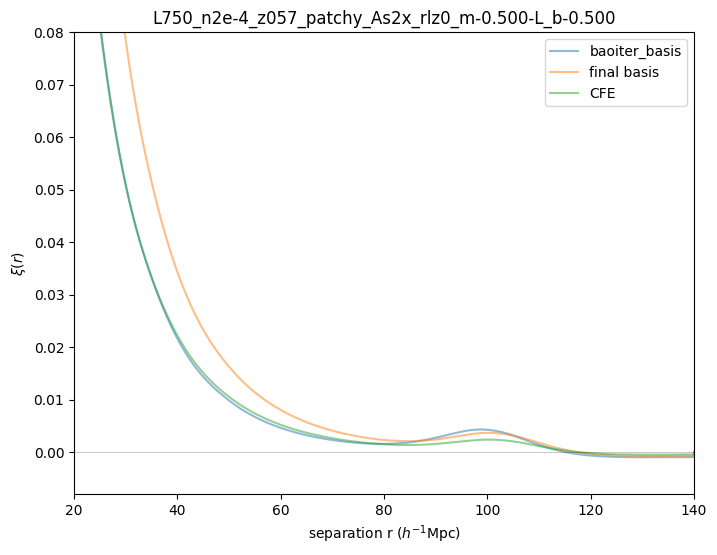

In [7]:
compare_baoiter_bases(mockset)

### gradient, same but m=0.75

In [8]:
L = 750
n = '2e-4'
As = 2
rlzs = [0]
mockset = MockSet(L, n, As=As, rlzs=rlzs)
grad_dim = 3
m = 0.75
b = 0.5
mockset.add_gradient(grad_dim, m, b, same_dir=False)

cfe file not found


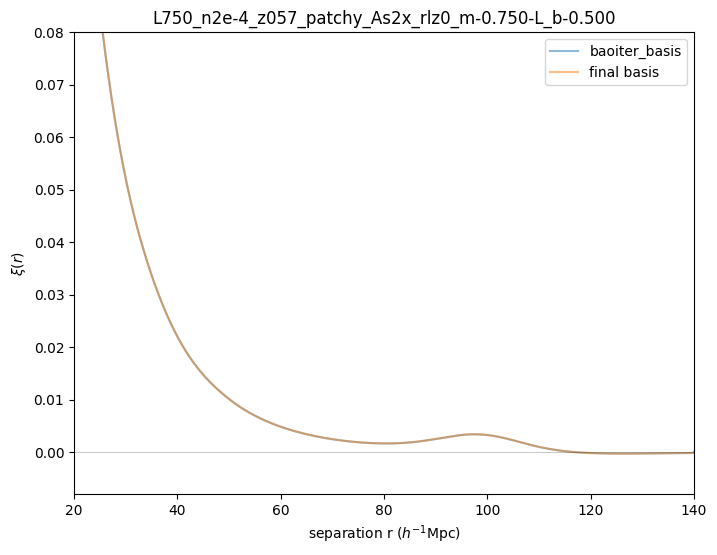

In [9]:
compare_baoiter_bases(mockset)

### lognormal

In [10]:
# try lognormal
L = 750
n = '2e-4'
As = 2
rlzs = [0]
mockset = MockSet(L, n, As=As, rlzs=rlzs)

In [11]:
print(mockset.mock_fn_list)

['L750_n2e-4_z057_patchy_As2x_rlz0_lognormal']


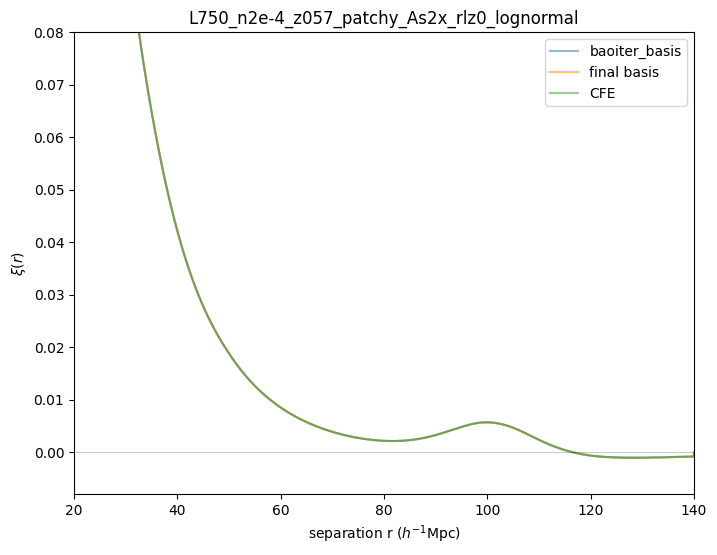

In [12]:
compare_baoiter_bases(mockset, i=0)